In [1]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
# Check data types and nulls
print(df.info())

# Rename columns for easier access
df.columns = [col.replace(" ", "_").lower() for col in df.columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


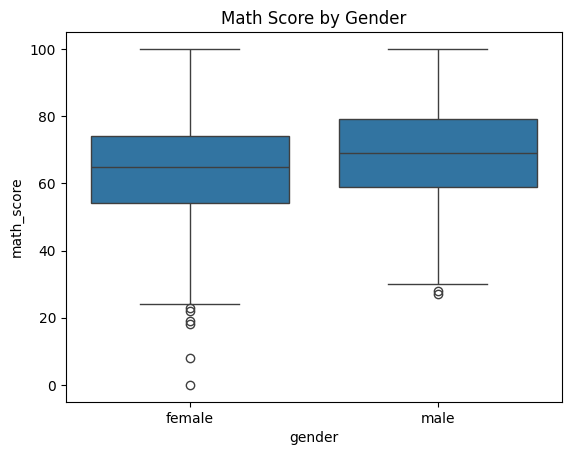

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for gender vs math score
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Score by Gender")
plt.show()


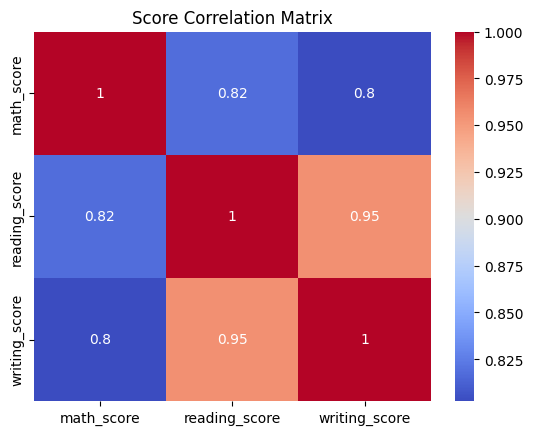

In [5]:
# Correlation matrix
corr = df[['math_score', 'reading_score', 'writing_score']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Score Correlation Matrix")
plt.show()


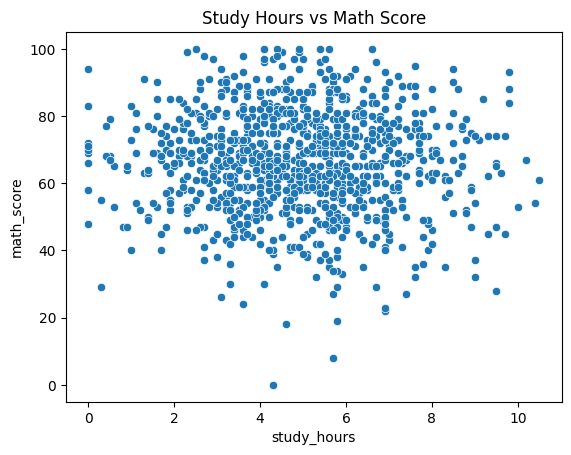

In [6]:
import numpy as np

# Add synthetic study hours
np.random.seed(0)
df['study_hours'] = np.random.normal(loc=5, scale=2, size=len(df)).round(1)
df['study_hours'] = df['study_hours'].clip(lower=0)

# Plot study hours vs math score
sns.scatterplot(x='study_hours', y='math_score', data=df)
plt.title("Study Hours vs Math Score")
plt.show()


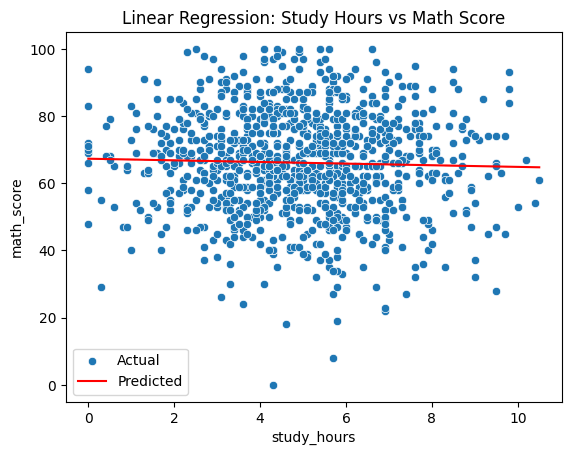

R² score: 0.00


In [7]:
from sklearn.linear_model import LinearRegression

# Prepare features and target
X = df[['study_hours']]
y = df['math_score']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict
df['predicted_math'] = model.predict(X)

# Plot the regression line
sns.scatterplot(x='study_hours', y='math_score', data=df, label='Actual')
sns.lineplot(x='study_hours', y='predicted_math', data=df, color='red', label='Predicted')
plt.title("Linear Regression: Study Hours vs Math Score")
plt.show()

# Print R^2 score
print(f"R² score: {model.score(X, y):.2f}")


In [8]:
# Save the updated dataframe with predictions
df.to_csv("Student_Performance_Analysis.csv", index=False)
